In [1]:
import os
import re
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

With the summary and dataset from the previous section (Getting Started with the Case Study), your first challenge is to:

*Investigate the extent and nature of the missing data 

*Design and implement an imputation technique for the missing data

*Produce a visualization for AAVAIL stakeholders on the US and Singapore markets using your modified dataset

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'aavail-data-visualization.csv',
 'Data-Visualization-Unit-Local',
 'Data-Visualization-Unit-Local.zip',
 'Untitled.ipynb']

In [3]:
df = pd.read_csv('aavail-data-visualization.csv')
df

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0
1,2,singapore,31.0,Ensley Garza,False,NaN,12.0
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0
...,...,...,...,...,...,...,...
995,996,singapore,55.0,Peyton Enriquez,False,aavail_unlimited,14.0
996,997,united_states,23.0,Amina Manning,True,aavail_basic,24.0
997,998,united_states,25.0,Brooks Ventura,True,aavail_unlimited,17.0
998,999,united_states,40.0,Nayeli Mathis,True,aavail_unlimited,16.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1000 non-null   int64  
 1   country_name     1000 non-null   object 
 2   age              1000 non-null   float64
 3   customer_name    1000 non-null   object 
 4   is_subscriber    1000 non-null   bool   
 5   subscriber_type  928 non-null    object 
 6   num_streams      954 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 48.0+ KB


In [5]:
df['subscriber_type'].unique()

array(['aavail_premium', nan, 'aavail_basic', 'aavail_unlimited'],
      dtype=object)

In [6]:
df[~df['subscriber_type'].isna()]['num_streams'].unique()

array([23., 22., 19., nan, 18., 20., 24.,  1., 21.,  5., 14., 15., 26.,
        9.,  6.,  7., 17., 10., 16.,  8., 13., 25., 29., 11., 12., 27.,
        4.,  3.])

In [7]:
len(df[~df['subscriber_type'].isna()]['num_streams'].unique())

28

In [8]:
df.isnull().sum(axis = 0)

customer_id         0
country_name        0
age                 0
customer_name       0
is_subscriber       0
subscriber_type    72
num_streams        46
dtype: int64

In [9]:
len(df[~df['subscriber_type'].isna() & df['num_streams'].isna()])

45

In [10]:
len(df.dropna())

883

In [11]:
df.drop(['subscriber_type'] ,axis =1).dropna()

,customer_id,country_name,age,customer_name,is_subscriber,num_streams
0,1,united_states,21.0,Kasen Todd,True,23.0
1,2,singapore,31.0,Ensley Garza,False,12.0
2,3,united_states,22.0,Lillian Carey,False,22.0
3,4,united_states,21.0,Beau Christensen,True,19.0
4,5,singapore,22.0,Ernesto Gibson,True,23.0
...,...,...,...,...,...,...
995,996,singapore,55.0,Peyton Enriquez,False,14.0
996,997,united_states,23.0,Amina Manning,True,24.0
997,998,united_states,25.0,Brooks Ventura,True,17.0
998,999,united_states,40.0,Nayeli Mathis,True,16.0


# Investigation Conclusion:
The missing info regarding subscriber type represent .072 % of the data ,but since we are looking for churn we can use the (is_subscriber) column ,so I would recommend losing that column
as for num_streams , we could build a small prediction model to fill it based on other features 
but the size of the data is not encouriging , so I will drop all missing rows 

In [12]:
df1 = df.drop(['subscriber_type'] ,axis =1).dropna()

In [13]:
df1['country_name'].value_counts()

united_states    676
singapore        278
Name: country_name, dtype: int64

In [14]:
df1['age'].unique()

array([21., 31., 22., 49., 47., 26., 15., 40., 19., 23., 27., 45., 29.,
       39., 42., 20., 25., 28., 38., 34., 24., 51., 33., 44., 30., 18.,
       17., 41., 36., 55., 48., 50., 32., 16., 56., 43., 37., 35., 53.,
       54., 46., 14., 57.])

In [15]:
df1

,customer_id,country_name,age,customer_name,is_subscriber,num_streams
0,1,united_states,21.0,Kasen Todd,True,23.0
1,2,singapore,31.0,Ensley Garza,False,12.0
2,3,united_states,22.0,Lillian Carey,False,22.0
3,4,united_states,21.0,Beau Christensen,True,19.0
4,5,singapore,22.0,Ernesto Gibson,True,23.0
...,...,...,...,...,...,...
995,996,singapore,55.0,Peyton Enriquez,False,14.0
996,997,united_states,23.0,Amina Manning,True,24.0
997,998,united_states,25.0,Brooks Ventura,True,17.0
998,999,united_states,40.0,Nayeli Mathis,True,16.0


# Data Visualization

Main Features we have here (age, num_streams)
So We Will explore their effect on Subscription Status

In [49]:
df_sing = df[df['country_name'] == 'singapore']

df_us = df[df['country_name'] == 'united_states']


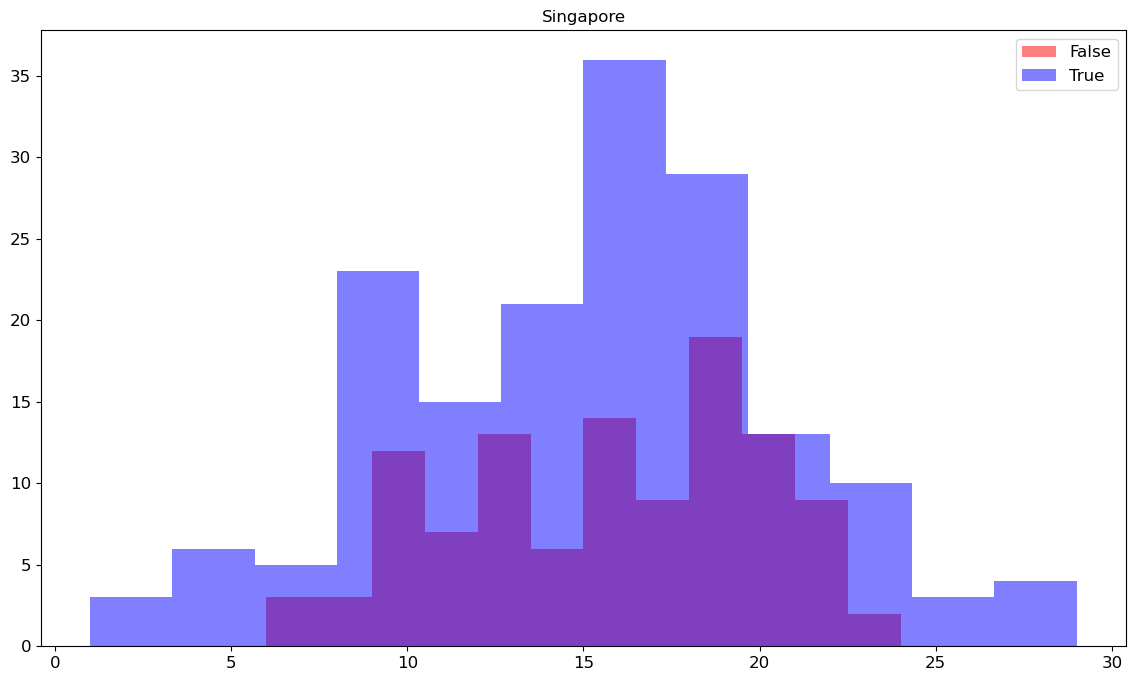

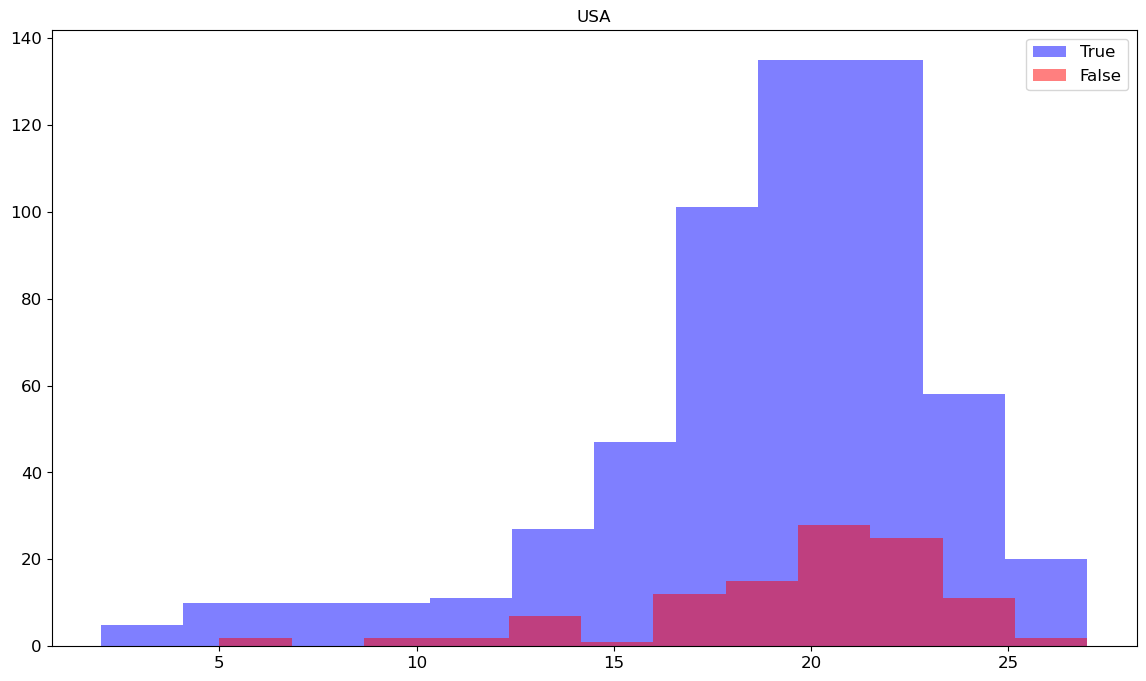

In [23]:
fig = plt.figure(figsize=(14,8))


plt.hist(df_sing[df_sing['is_subscriber'] == True]['num_streams'] , bins =12,alpha = .5 , color ='red' )
plt.hist(df_sing[df_sing['is_subscriber'] == False]['num_streams'] , bins =12,alpha = .5 , color = 'blue')
plt.title("Singapore");
plt.legend(df_sing['is_subscriber'])

plt.show()


fig = plt.figure(figsize=(14,8))

plt.hist(df_us[df_us['is_subscriber'] == True]['num_streams'] , bins =12,alpha = .5 , color = 'blue')
plt.hist(df_us[df_us['is_subscriber'] == False]['num_streams'] , bins =12,alpha = .5 , color = 'red')
plt.title("USA");
plt.legend(df_us['is_subscriber'])

plt.show()

### Num Of streams conclusion
Not having an effect , same distrubtuion in USA and Singapor for Subscribed and none 

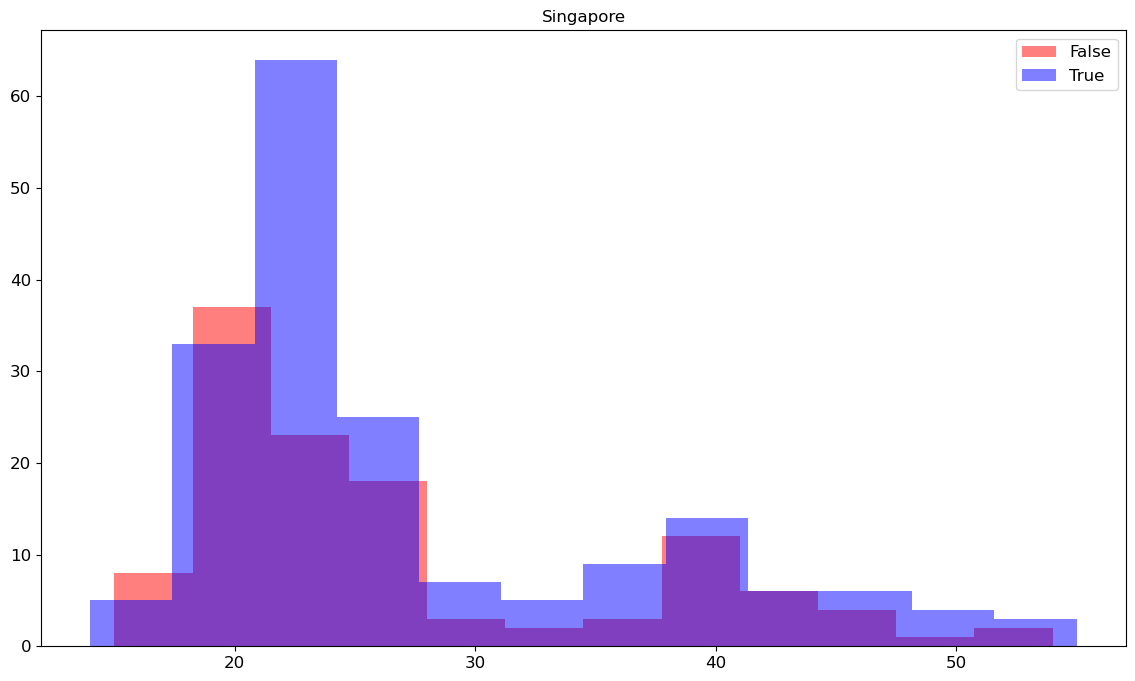

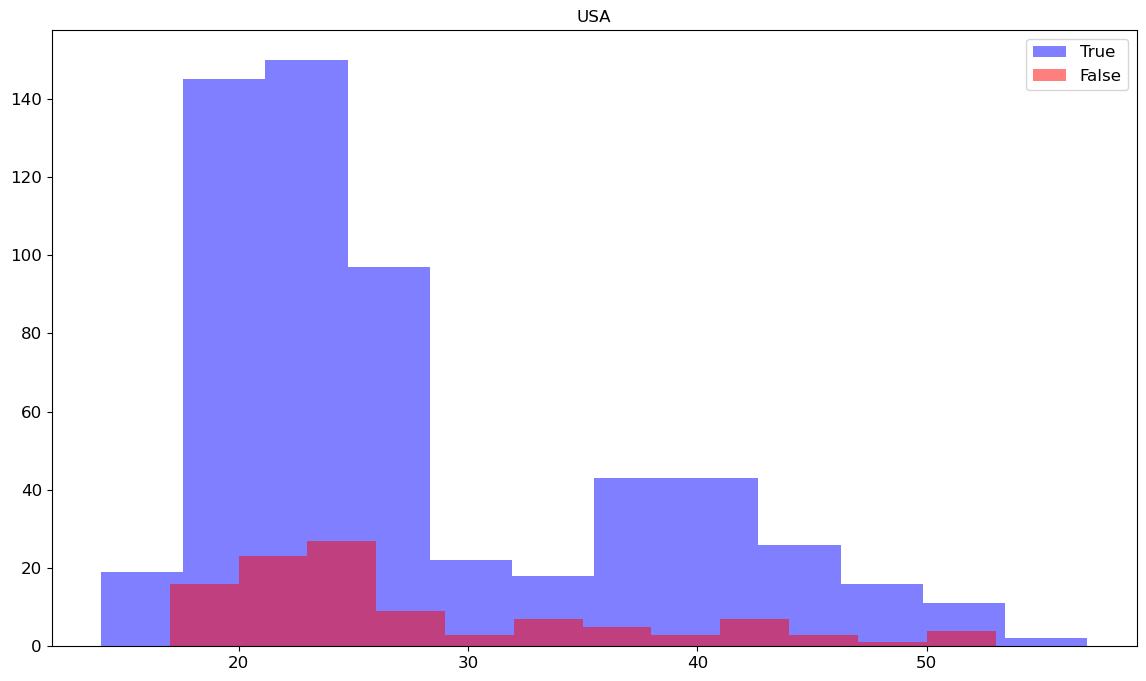

In [24]:
fig = plt.figure(figsize=(14,8))


plt.hist(df_sing[df_sing['is_subscriber'] == True]['age'] , bins =12,alpha = .5 , color ='red' )
plt.hist(df_sing[df_sing['is_subscriber'] == False]['age'] , bins =12,alpha = .5 , color = 'blue')
plt.title("Singapore");
plt.legend(df_sing['is_subscriber'])

plt.show()


fig = plt.figure(figsize=(14,8))

plt.hist(df_us[df_us['is_subscriber'] == True]['age'] , bins =12,alpha = .5 , color = 'blue')
plt.hist(df_us[df_us['is_subscriber'] == False]['age'] , bins =12,alpha = .5 , color = 'red')
plt.title("USA");
plt.legend(df_us['is_subscriber'])

plt.show()

### Age Effect conclusion
Also not having an effect , same distrubtuion in USA and Singapor for Subscribed and none 

### Subscribtion Churn in the USA VS Singapore
Here we view the main point regardless of other features , country vs country

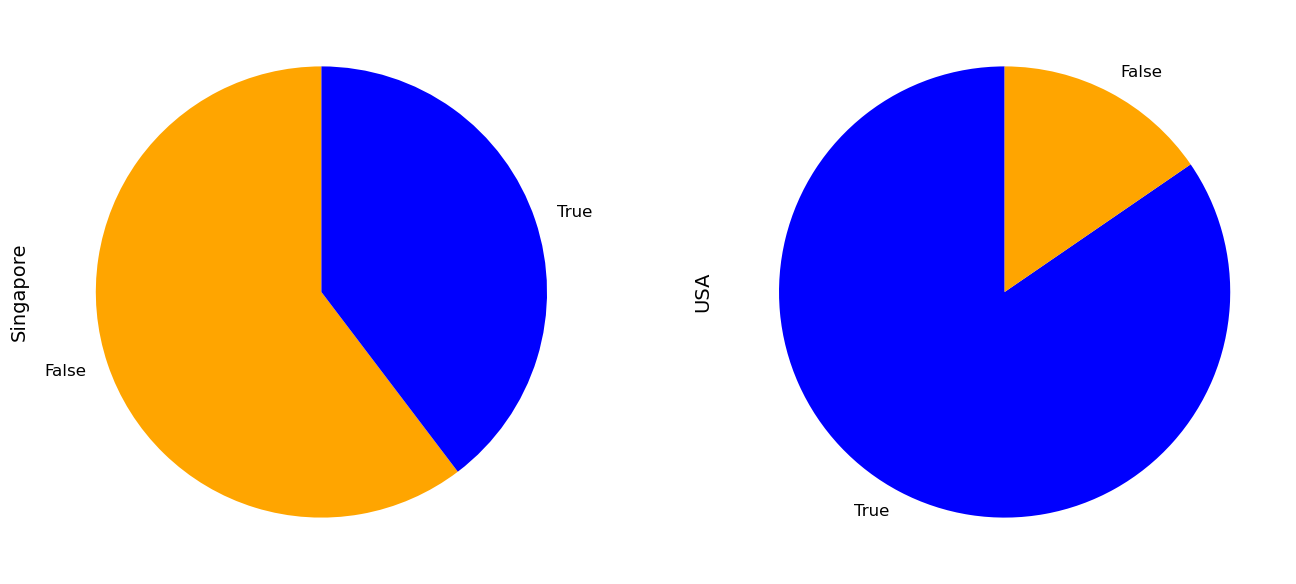

In [48]:
color_map = {True: 'blue', False: 'orange'}  # You can choose any colors you like

# Plotting
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Plot pie charts
df_sing['is_subscriber'].value_counts().plot(
    kind='pie',
    ax=ax1,
    colors=[color_map[val] for val in df_sing['is_subscriber'].value_counts().index],
    startangle=90
)
ax1.set_ylabel("Singapore")

df_us['is_subscriber'].value_counts().plot(
    kind='pie',
    ax=ax2,
    colors=[color_map[val] for val in df_us['is_subscriber'].value_counts().index],
    startangle=90
)
ax2.set_ylabel("USA")

plt.tight_layout()
plt.show()

## Conclusion
Well it seems that the Market in singapore has a really high churn rate , unlike in USA
but Age is not the factor here , need to gather more data about the content presetned maybe